In [1]:
import torch
torch.__version__

'2.3.1+cu118'

# 张量简介
例如，下图图像

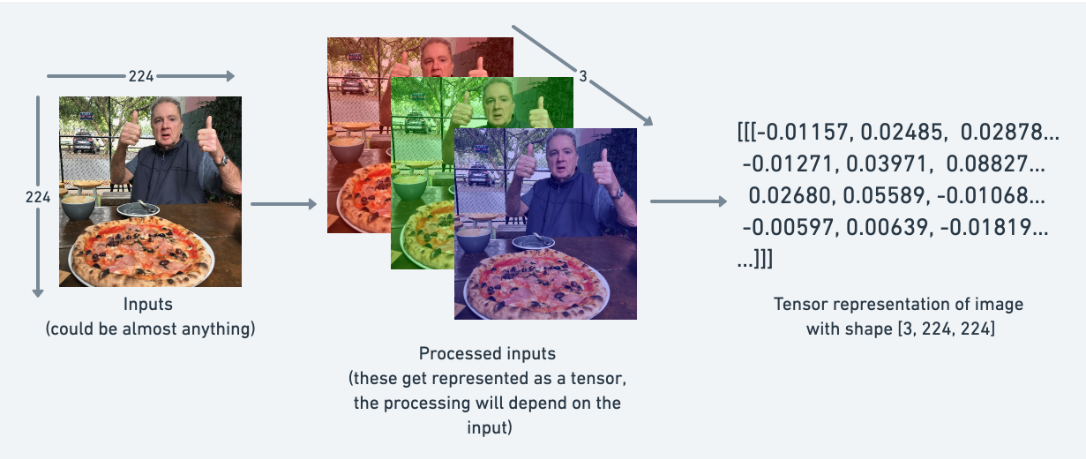




可以将图像表示为形状为`[3, 224, 224]`的张量，意味着`[colour_channels, height, width]`，即图像具有`3`个颜色通道（红，绿，蓝），高度为`224`个像素，宽度为`224`个像素

在张量语言中，张量将具有三个维度，一个用于`colour_channels`，一个用于`height`，一个用于`width`

## 创建张量
第一件事是创建一个标量。

标量是一个单一的数字，在张量语言中，它是一个零维张量。

In [2]:
# Scalar
scalar = torch.tensor(7)
scalar

tensor(7)

输出是`tensor(7)`，表明虽然`scalar`的`7`是一个单一的数字，但是它的类型是`torch.Tensor`！

我们可以使用`ndim`来检查张量的维度

In [3]:
scalar.ndim

0

如果想从张量中提取数字的话，使用`item()`方法

In [4]:
# Get the Python number within a tensor (only works with one-element tensors)
scalar.item()

7

下面考察一个`向量`，`向量`是一维张量，可以包含很多数字，用一组`[ ]`括起来的数字。 

In [5]:
# Vector
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [6]:
# 查看维度
vector.ndim

1

这有一个窍门来判断PyTorch张量的维数，计算查看一侧的`[`（比如左侧的中括号个数），有几个中括号，向量就是几维向量。

张量的另一个重要的概念是 `shape` 属性。形状会告诉我们它们内部元素的排列方式。
下面查看`vector`的形状

In [7]:
# Check shape of vector
vector.shape

torch.Size([2])

意味着向量的形状为`2`。因为放置在方括号内的两个元素为 `([7,7])`。

下面来看一个矩阵

In [8]:
MATRIX = torch.tensor([
    [7, 8],
    [9, 10]
])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

矩阵比向量多了一个维度，跟向量一样灵活。

In [9]:
MATRIX.ndim

2

查看一下形状

In [10]:
MATRIX.shape

torch.Size([2, 2])

这个形状表明这个矩阵是`2`层深(deepth)，`2`层宽(width)

创建一个三维张量(tensor)

In [11]:
TENSOR = torch.tensor([
    [
        [1, 2, 3],
        [3, 6, 9],
        [2, 4, 5]
    ]
])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

张量几乎可以表示任何东西。看一下维度和形状。

In [14]:
TENSOR.ndim

3

In [15]:
TENSOR.shape

torch.Size([1, 3, 3])

尺寸从外向内，意味着有一个 $3 \times 3$ 的维度

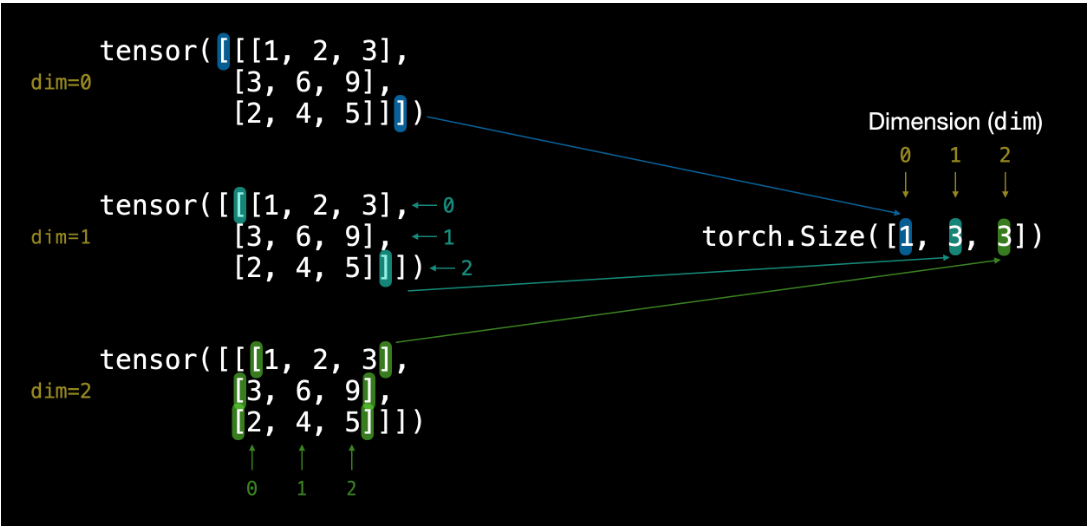

总结一下：

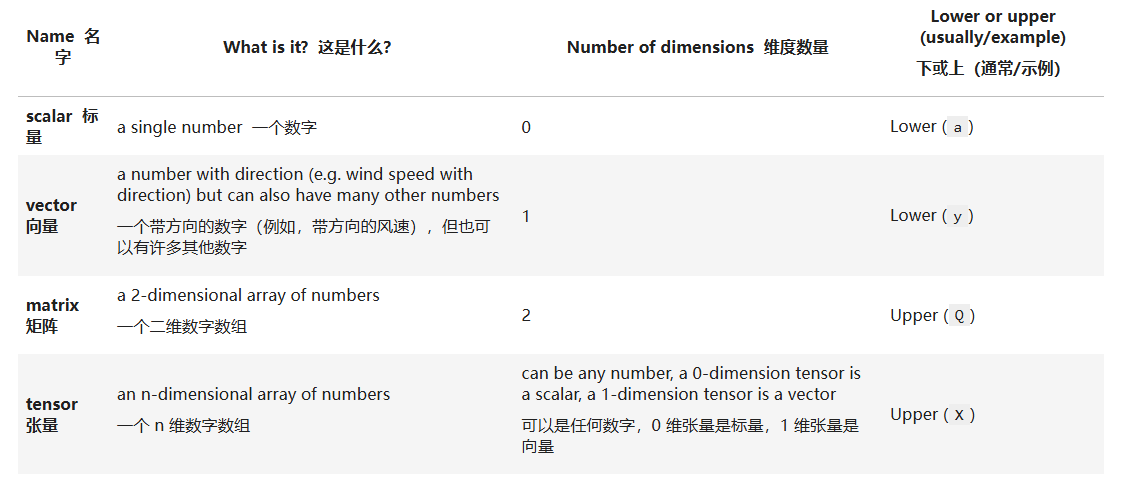

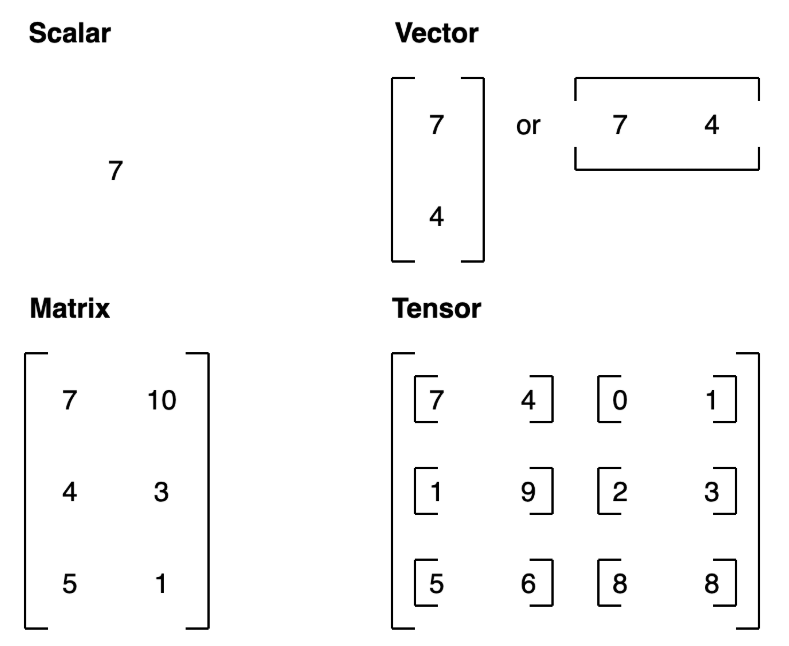

## 随机张量
机器学习模型很少需要手动创建张量，相反，机器学习模型通常是从大量随机的数字张量开始，并在处理数据的过程中调整这些随机数字，以更好地表示数据。

本质上是以下流程：
`Start with random numbers -> look at data -> update random numbers -> look at data -> update random numbers...`

可以定义机器学习模如何开始（初始化）、查看数据（表示）和更新（优化）其随机数。

现在先来看看如何创建一个随机数的张量。

使用`torch.rand()`并传入`size`参数

In [17]:
# torch.rand()函数创建一个随机变量，其元素服从均匀分布。
random_tensor = torch.rand(size=(3, 4)) # size（3， 4） 表示张量的形状，为3行4列
random_tensor, random_tensor.dtype # dtype属性返回张量中元素的数据类型

(tensor([[0.1475, 0.2942, 0.6741, 0.7484],
         [0.7210, 0.4963, 0.4643, 0.9511],
         [0.1791, 0.6762, 0.6567, 0.4394]]),
 torch.float32)

`torch.rand()`的灵活性在于我们可以将`size`调整为我们想要的任何东西。

例如，假设想要一个形状为`[224, 224, 3]`（`[height, width, color_channels]`）的随机张量。

In [18]:
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

## 0 和 1
有时为了掩蔽张量中的某些值，来让模型不学习它们，所以只想用`0`或`1`来填充张量。

In [19]:
# 创建一个全零张量
zeros = torch.zeros(size=(3, 4))
zeros, zeros.dtype

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 torch.float32)

In [20]:
# 创建一个全1的张量
ones = torch.ones(size=(3, 4))
ones, ones.dtype

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 torch.float32)

## 创建一个范围的张量
例如，数字1 到 10 或数字 0 到 100

用`torch.arange(start, end, step)`

如下图：

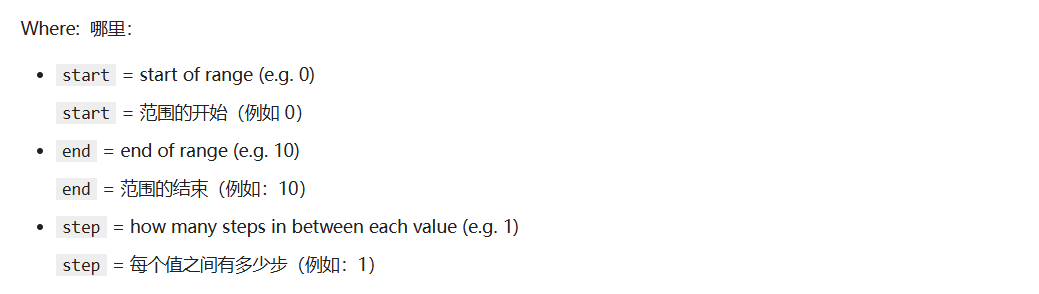

In [21]:
# 创建一个0到10的一维张量，注意不包括10
zero_to_ten = torch.arange(start=0, end=10, step=1)
zero_to_ten

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

如果想要一个与另一个张量形状相同的某种类型的张量。

例如，一个与之前的张量形状相同的全零张量。

使用`torch.zeros_like(input)`或者`torch.ones_like(input)`，它们分别返回一个与`input`形状完全相同的全零或者全1的张量。

In [22]:
# Can also create a tensor of zeros similar to another tensor
ten_zeros = torch.zeros_like(input=zero_to_ten) # will have same shape
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## 张量数据类型
有许多，最常见的是`torch.float32`或者`torch.float`。

低精度数据类型通常计算速度更快，但在评估指标 如准确性上牺牲了一些性能（计算更快但是准确性较低）


如何创建具有特定数据类型的一些张量呢？ 

使用`dtype`参数可以做做到这一点

In [23]:
# 默认的数据类型是float32类型
float_32_tensor = torch.tensor(
    [3.0, 6.0, 9.0],
    dtype=None, # 默认为 None，即 torch.float32 或传递的任何数据类型
    device=None, # 默认为 None，使用默认张量类型
    requires_grad=False # 如果为 True，则记录对张量执行的操作
)

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

(torch.Size([3]), torch.float32, device(type='cpu'))

除了形状问题（张量形状不匹配），在pytorch中还有两个最常见的问题，分别是，`数据类型` 和 `设备问题`。

例如，一个张量是`torch.float32`，另一个是`torch.float16`（PyTorch 通常喜欢张量具有相同的格式）。

又例如，一个张量是在CPU上，另一个在GPU上，（pytorch喜欢在同一设备上进行张量之间的计算）。

现在创建一个包含`dtype=torch.float16`的张量。

In [24]:
float_16_tensor = torch.tensor(
    [3.0, 6.0, 9.0],
    dtype=torch.float16
)
float_16_tensor.dtype

torch.float16

## 从张量获取信息
一旦创建了张量，可能想从中获取一些信息。

了解张量的最常见的属性是
* `shape`-张量的形状是什么？（某些操作需要特定的形状规则）
* `dtype`-张量内的元素储存在哪种数据类型中？
* `device`-张量储存在哪个设备上（通常是GPU或者CPU）

创建一个随机张量并了解它的详细信息。

In [25]:
# 创建一个随机张量
some_tensor = torch.rand(3, 4)

# 发现张量的细节
print(some_tensor)
print(f'张量的形状：{some_tensor.shape}')
print(f'张量的数据类型：{some_tensor.dtype}')
print(f'张量的储存设备：{some_tensor.device}')

tensor([[2.5213e-05, 4.5023e-01, 2.3422e-01, 8.7350e-02],
        [8.1520e-02, 4.4016e-01, 9.3278e-01, 3.3799e-01],
        [3.3636e-01, 6.4607e-01, 3.7827e-01, 9.8550e-01]])
张量的形状：torch.Size([3, 4])
张量的数据类型：torch.float32
张量的储存设备：cpu


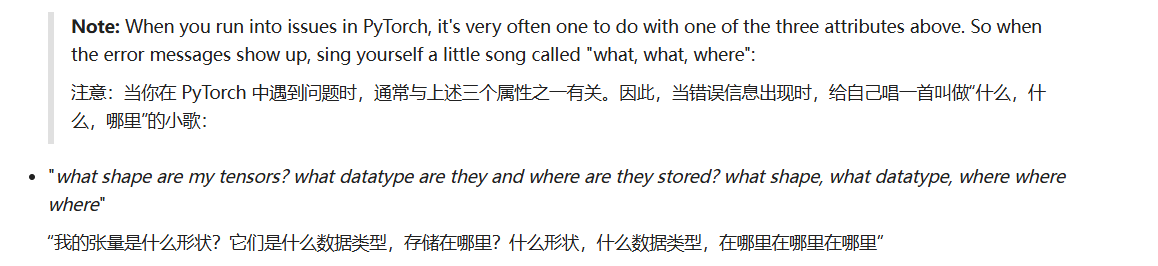

## 张量的操作（运算）

在深度学习中，数据（图像，文本，视频，音频，蛋白质结构等等）都被表示成张量。

一些模型通过研究这些张量并对张量执行一系列操作来学习，已创建输入数据中模式的表示。

这些操作有：
* 加法
* 减法
* 逐元素乘法
* 除法
* 矩阵乘法



### 从基本操作 加、减、乘开始

In [26]:
# 张量加法
tensor = torch.tensor([1, 2, 3])
tensor + 10 # 在每个元素上加10

tensor([11, 12, 13])

In [28]:
# 每个元素乘10
tensor * 10

tensor([10, 20, 30])

注意元素没有变成`tensor([110, 120, 130])`。

是因为张量内部的值不会变，除非它们被重新赋值。

In [30]:
# 张量的值不变，除非重新赋值
tensor

tensor([1, 2, 3])

接下来减去一个数字，并重新分配给`tensor`

In [31]:
# 减去并重新赋值
tensor = tensor - 10
tensor

tensor([-9, -8, -7])

In [32]:
# 加上重新赋值
tensor = tensor + 10
tensor

tensor([1, 2, 3])

PyTorch还具有一些内置函数，如`torch.mul()`（乘法的简写）和`torch.add()`，用于执行基本操作。

In [33]:
# 使用内置函数
torch.multiply(tensor, 10)

tensor([10, 20, 30])

### 矩阵乘法

PyTorch在`torch.matmul()`方法中实现了矩阵乘法功能。

矩阵乘法的两个主要规则：
1. 内部尺寸必须匹配：
    * `(3, 2) @ (3, 2)`无法工作
    * `(3, 2) @ (2, 3)`可以工作
    * `(2, 3) @ (3, 2)`可以工作

1. 结果矩阵的形状是外部维度：
    * `(3, 2) @ (2, 3)` -> `(3, 3)`
    * `(2, 3) @ (3, 2)` -> `(2, 2)`

下面是一个例子

In [34]:
import torch
tensor = torch.tensor([1, 2, 3])
tensor.shape

torch.Size([3])

元素逐位相乘和矩阵相乘之间的区别在于值的相加。

对于`tensor`变量，其值为`[1, 2, 3]`:


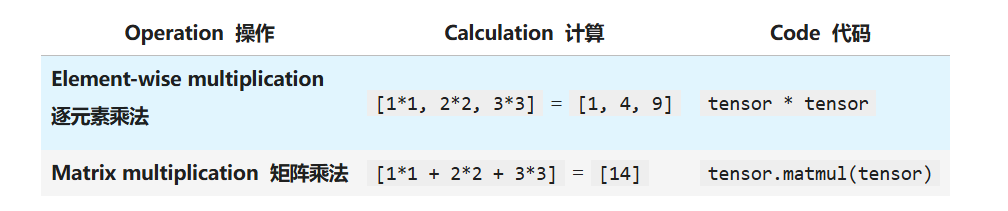


In [35]:
# 元素相乘
tensor * tensor

tensor([1, 4, 9])

In [36]:
# 矩阵相乘
torch.matmul(tensor, tensor)

tensor(14)

下面是`手动矩阵相乘`和使用内置`torch.matmul()`函数进行效率对比

In [37]:
%%time
# 手动计算矩阵相乘
# 尽量避免使用for循环进行计算，因为计算代价特别昂贵！
value = 0
for i in range(len(tensor)):
    value += tensor[i] * tensor[i]

value

CPU times: user 1.08 ms, sys: 279 μs, total: 1.36 ms
Wall time: 1.15 ms


tensor(14)

In [39]:
%%time
# 使用内置函数torch.matmul()
torch.matmul(tensor, tensor)

CPU times: user 93 μs, sys: 0 ns, total: 93 μs
Wall time: 98 μs


tensor(14)

## 深度学习中最常见的错误之一（形状错误）

因为深度学习的很多内容都是在对矩阵进行乘法和运算，而矩阵在组合时有严格的形状和大小规则，因此在深度学习中最常见的错误之一就是形状不匹配。

举个例子

In [42]:
# 两个（3， 2）张量相乘会发生什么？
tensor_A = torch.rand(size=(3, 2))
tensor_B = torch.rand(size=(3, 2))

torch.matmul(tensor_A, tensor_B)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

可以通过使用它们的内维度来匹配实现`tensor_A`和`tensor_B`之间的矩阵乘法。

实现方法：
1. 进行转置（交换给定张量的维度）。

    转置也有两种方法：
    * `torch.transpose(input, dim0, dim1)`: 这里`input`是要转置的张量；`dim0`和`dim1`是要进行交换的维度
    * `tensor.T`: 其中`tensor`是要转置的张量。


In [43]:
# 打印tensor_A和tenor_B
print(tensor_A)
print(tensor_B)

tensor([[0.1603, 0.1967],
        [0.5875, 0.4360],
        [0.8376, 0.0542]])
tensor([[0.6312, 0.1271],
        [0.8332, 0.9394],
        [0.4961, 0.9607]])


In [44]:
# 打印tensor_A和tensor_B.T
print(tensor_A)
print(tensor_B.T)

tensor([[0.1603, 0.1967],
        [0.5875, 0.4360],
        [0.8376, 0.0542]])
tensor([[0.6312, 0.8332, 0.4961],
        [0.1271, 0.9394, 0.9607]])


In [46]:
# 当tensor_B转置后，矩阵相乘操作就可以工作
print(f"初始形状: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}\n")
print(f"新形状: tensor_A = {tensor_A.shape}(和上面一样), tensor_B.T = {tensor_B.T.shape}\n")
print(f"矩阵相乘之后的形状: {tensor_A.shape} * {tensor_B.T.shape}内部维度相匹配\n")
print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output)
print(f"\n输出的形状: {output.shape}")

初始形状: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])

新形状: tensor_A = torch.Size([3, 2])(和上面一样), tensor_B.T = torch.Size([2, 3])

矩阵相乘之后的形状: torch.Size([3, 2]) * torch.Size([2, 3])内部维度相匹配

Output:

tensor([[0.1262, 0.3183, 0.2685],
        [0.4262, 0.8991, 0.7103],
        [0.5356, 0.7488, 0.4676]])

输出的形状: torch.Size([3, 3])


还可以使用`torch.mm()`，这是`torch_matmul()`的缩写。

In [47]:
torch.mm(tensor_A, tensor_B.T)

tensor([[0.1262, 0.3183, 0.2685],
        [0.4262, 0.8991, 0.7103],
        [0.5356, 0.7488, 0.4676]])

神经网络充满了矩阵乘法和点积。

`torch.nn.Linear()`模块，也被称为前馈层或者全连接层，实现了输入`x`和权重矩阵`A`之间的矩阵乘法。
$$
    y = x \cdot A^T + b
$$
在这里，
* `x`是输入到该层的内容（深度学习是像`torch.nn.Linear()`这样的层叠加在一起的堆栈）。
* `A` 是由该层创建的权重矩阵，最初是随机数，随着神经网络学习更好地表示数据中的模式而进行调整（注意"T"，这是因为权重矩阵被转置了）。
* `b`是用于稍微偏移权重和输入的偏置项。
* `y`是输出（对输入的操作，希望能发现其中的模式）。

玩一下线性层！

尝试更改下面的`in_features`和`out_features`的值，看看会发生什么。

In [50]:
# 使用随机权重矩阵，并且为了能重复使用，设计一个随机种子
torch.manual_seed(42)
# 使用矩阵乘法
linear = torch.nn.Linear(
    in_features=2, # 输入特征符合输入矩阵的内部维度,即输入张量中的每个样本都有2个特征
    out_features=6, # 输出特征的数量，即线性变换后每个样本会得到6个新的特征维度。
    # in_feature 和 out_features是刻画权重矩阵的。
)
# 注意这里的权重矩阵形状是[6, 2], 和输入相乘的时候，使用的是权重矩阵的转置！

x = tensor_A
output = linear(x) # 自动带入到线性层和内置权重矩阵进行计算，这里的x是输入，结果存储在output中
print(f"输入形状：{x.shape}\n")
print(f"输出：\n{output}\n\n输出的形状：{output.shape}")

输入形状：torch.Size([3, 2])

输出：
tensor([[ 0.7245,  0.1970,  0.3442, -0.0734,  0.5430,  0.2291],
        [ 1.0959,  0.2817,  0.3122, -0.1210,  0.6851,  0.5233],
        [ 1.0071, -0.0078,  0.2189, -0.3657,  1.0391,  0.6265]],
       grad_fn=<AddmmBackward0>)

输出的形状：torch.Size([3, 6])


## 查找最小值、最大值、平均值、总和等（聚合）
来看几种聚合它们的方法（从更多的值到更少的值）。

首先创建一个张量，然后找到它的最大值、最小值、平均值和总和。

In [51]:
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

进行一些汇总

In [52]:
print(f"Minimum: {x.min()}")
print(f"Maximum: {x.max()}")
# 直接使用x.mean()会报错
print(f"平均值：{x.type(torch.float32).mean()}") # 必须为x指定数据类型
print(f"和: {x.sum()}")

Minimum: 0
Maximum: 90
平均值：45.0
Sum: 450


还可以用`torch`做同样的事情。

In [53]:
torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x)

(tensor(90), tensor(0), tensor(45.), tensor(450))

## 最大值、最小值的位置
还可以分别使用`torch.argmax()`和`torch.argmin()`找到张量中最大值或最小值出现的索引。

这在只想要最高（或最低）值的位置的而不是实际值本身时很有帮助（比如使用 $\mathrm{softmax}$ 激活函数时）

In [55]:
# 创建一个张量
tensor = torch.arange(10, 100, 10)
print(f"Tensor: {tensor}")

# 得到tensor的最大值和最小值的位置索引
print(f"最大值位置的索引： {tensor.argmax()}")
print(f"最小值的位置索引： {tensor.argmin()}")

Tensor: tensor([10, 20, 30, 40, 50, 60, 70, 80, 90])
最大值位置的索引： 8
最小值的位置索引： 0


## 更改张量的数据类型
张量的数据类型不同，再操作的时候可能会出现错误